In [19]:
# Import the modules
import pandas as pd
import hvplot.pandas
from pathlib import Path
import matplotlib.pyplot as plt

In [20]:
# Read and output the csv
df_movies = pd.read_csv('../DataSets/Movies_data_V3.csv')
df_movies['Title'] = df_movies['Title'].str.replace(r'\s\(\d{4}\)', '', regex=True)
df_movies.head()

,YEAR,MovieID,Title,Genres_Western,Genres_War,Genres_Thriller,Genres_Sci-Fi,Genres_Romance,Genres_Mystery,Genres_Musical,...,Genres_Film-Noir,Genres_Fantasy,Genres_Drama,Genres_Documentary,Genres_Crime,Genres_Comedy,Genres_Children's,Genres_Animation,Genres_Adventure,Genres_Action
0,1995,1,Toy Story,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,1995,2,Jumanji,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1995,3,Grumpier Old Men,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1995,4,Waiting to Exhale,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,1995,5,Father of the Bride Part II,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [21]:
# Read and output the csv
df_rating = pd.read_csv('../DataSets/ratings_clean.csv')
df_rating.head()

,UserID,MovieID,Rating,Timestamp
0,438,193,4,980904915
1,438,19,1,976258257
2,438,1013,3,981602900
3,438,1954,3,981602012
4,438,1017,3,981602575


In [22]:
# Read and output the csv
df_users = pd.read_csv('../DataSets/users_clean_V2.csv')

df_users.head()

,UserID,Gender,Age,Occupation
0,1,1,1,10
1,2,2,56,16
2,3,2,25,15
3,4,2,45,7
4,5,2,25,20


## Create a Data Base

In [23]:
from sqlalchemy import create_engine
import os

In [24]:
# Define the path
database_path = os.path.join('Resources', 'combined_movies_dataset.sqlite')

# Create a single SQLite database connection
engine = create_engine(f'sqlite:///{database_path}')

# Write each DataFrame to a separate table in the SQLite database
df_movies.to_sql('movies', engine, if_exists='replace', index=False)
df_rating.to_sql('ratings', engine, if_exists='replace', index=False)
df_users.to_sql('users', engine, if_exists='replace', index=False)


6040

In [25]:
# With our three data bases, perform a join
# Define the SQL query to join ratings, movies, and users
query = """
    SELECT 
        r.UserID,
        m.MovieID,
        m.Year,
        r.Rating,
        m.Genres_Western,
        m.Genres_War,
        m.Genres_Thriller,
        m."Genres_Sci-Fi",
        m.Genres_Romance,
        m.Genres_Mystery,
        m.Genres_Musical,
        m.Genres_Horror,
        m."Genres_Film-Noir",
        m.Genres_Fantasy,
        m.Genres_Drama,
        m.Genres_Documentary,
        m.Genres_Crime,
        m.Genres_Comedy,
        m."Genres_Children's",
        m.Genres_Animation,
        m.Genres_Adventure,
        m.Genres_Action
    FROM ratings r
    JOIN movies m ON r.MovieID = m.MovieID
    JOIN users u ON r.UserID = u.UserID
    WHERE m.Year is not NULL
"""

# Load the result into a pandas DataFrame
df_combined = pd.read_sql(query, engine)
df_combined.head()



,UserID,MovieID,YEAR,Rating,Genres_Western,Genres_War,Genres_Thriller,Genres_Sci-Fi,Genres_Romance,Genres_Mystery,...,Genres_Film-Noir,Genres_Fantasy,Genres_Drama,Genres_Documentary,Genres_Crime,Genres_Comedy,Genres_Children's,Genres_Animation,Genres_Adventure,Genres_Action
0,1,1,1995,5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,6,1,1995,4,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,8,1,1995,4,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,9,1,1995,5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,10,1,1995,5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [26]:
# With our three data bases, perform a join
# Define the SQL query to join ratings, movies, and users
query = """
    SELECT 
        r.UserID,
        m.MovieID,
        u.Age,
        u.Gender,
        u.Occupation,
        m.Title
    FROM ratings r
    JOIN movies m ON r.MovieID = m.MovieID
    JOIN users u ON r.UserID = u.UserID
    WHERE m.Year is not NULL
"""

# Load the result into a pandas DataFrame
df_removed_info = pd.read_sql(query, engine)
df_removed_info.head()



,UserID,MovieID,Age,Gender,Occupation,Title
0,1,1,1,1,10,Toy Story
1,6,1,50,1,9,Toy Story
2,8,1,25,2,12,Toy Story
3,9,1,25,2,17,Toy Story
4,10,1,35,1,1,Toy Story


In [27]:
df_combined[df_combined['YEAR'].isnull()]

,UserID,MovieID,YEAR,Rating,Genres_Western,Genres_War,Genres_Thriller,Genres_Sci-Fi,Genres_Romance,Genres_Mystery,...,Genres_Film-Noir,Genres_Fantasy,Genres_Drama,Genres_Documentary,Genres_Crime,Genres_Comedy,Genres_Children's,Genres_Animation,Genres_Adventure,Genres_Action


In [28]:
df_combined.set_index(["UserID", "MovieID"], inplace=True)

In [29]:
df_combined.head()

,,YEAR,Rating,Genres_Western,Genres_War,Genres_Thriller,Genres_Sci-Fi,Genres_Romance,Genres_Mystery,Genres_Musical,Genres_Horror,Genres_Film-Noir,Genres_Fantasy,Genres_Drama,Genres_Documentary,Genres_Crime,Genres_Comedy,Genres_Children's,Genres_Animation,Genres_Adventure,Genres_Action
UserID,MovieID,,,,,,,,,,,,,,,,,,,,
1,1,1995,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
6,1,1995,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
8,1,1995,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
9,1,1995,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
10,1,1995,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [30]:
df_combined.to_csv("../df_ratings.csv")

In [31]:
# Number of entries
df_combined.shape


(996676, 20)

In [32]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score

In [33]:
# Create a list to store inertia values
inertia = []

# Create a list to store the values of k
k = (2,3,4,5,6,7,8,9,10,11)

In [34]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(df_combined)
    inertia.append(k_model.inertia_)

In [35]:
# Create a Dictionary that holds the list values for k and inertia
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame using the elbow_data Dictionary
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,2,6.971756e+07
1,3,3.488927e+07
2,4,2.306371e+07
3,5,1.705636e+07
4,6,1.323402e+07


In [36]:
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)

:Curve   [k]   (inertia)

In [37]:
# Use the same loop as above with your own data
k_values = range(2, 20)
scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_combined)
    score = calinski_harabasz_score(df_combined, kmeans.labels_)
    scores.append(score)

In [38]:
# Select the best k based on the highest Calinski-Harabasz score
best_k = k_values[scores.index(max(scores))]
print(f"Best number of clusters (k) based on Calinski-Harabasz score: {best_k}")

Best number of clusters (k) based on Calinski-Harabasz score: 11


In [40]:
# Inference and Prediction with best K
kmeans = KMeans(n_clusters=30, random_state=0)
kmeans.fit(df_combined)

# Assign clusters to data
df_combined['cluster'] = kmeans.labels_

In [41]:
# Count the number of records in each cluster
cluster_counts = df_combined['cluster'].value_counts()
print("Record count per cluster:")
print(cluster_counts)

Record count per cluster:
cluster
17    99592
1     74680
15    69964
24    61933
26    58605
22    57993
20    54891
5     51638
9     50922
28    49037
10    41156
23    31805
25    31093
0     29194
19    28189
21    25559
14    24250
3     22188
4     19250
12    18247
16    18216
27    17059
11    12909
6     12434
7     10822
2      7549
13     6175
18     5034
8      4598
29     1694
Name: count, dtype: int64


In [42]:
# Encode the clusters
df_combined['cluster'] = df_combined['cluster'].astype("category")

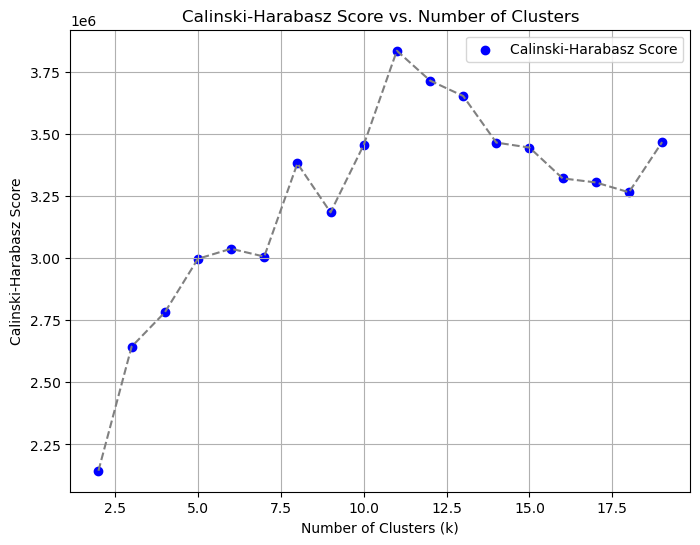

In [43]:
# Plot the Calinski-Harabasz scores
plt.figure(figsize=(8, 6))
plt.scatter(k_values, scores, color='blue', marker='o', label='Calinski-Harabasz Score')
plt.plot(k_values, scores, linestyle='--', color='gray')

# Add labels and title
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score vs. Number of Clusters')
plt.grid(True)
plt.legend()
plt.show()

In [44]:
#Add the classifying info
df_combined.reset_index()


,UserID,MovieID,YEAR,Rating,Genres_Western,Genres_War,Genres_Thriller,Genres_Sci-Fi,Genres_Romance,Genres_Mystery,...,Genres_Fantasy,Genres_Drama,Genres_Documentary,Genres_Crime,Genres_Comedy,Genres_Children's,Genres_Animation,Genres_Adventure,Genres_Action,cluster
0,1,1,1995,5,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,26
1,6,1,1995,4,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,26
2,8,1,1995,4,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,26
3,9,1,1995,5,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,26
4,10,1,1995,5,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996671,3401,3945,1999,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
996672,3610,3945,1999,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
996673,4007,3945,1999,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
996674,4260,3945,1999,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14


In [45]:
df_final = df_combined.merge(df_removed_info, on=["UserID", "MovieID"], how="left")
df_final

,UserID,MovieID,YEAR,Rating,Genres_Western,Genres_War,Genres_Thriller,Genres_Sci-Fi,Genres_Romance,Genres_Mystery,...,Genres_Comedy,Genres_Children's,Genres_Animation,Genres_Adventure,Genres_Action,cluster,Age,Gender,Occupation,Title
0,1,1,1995,5,0,0,0,0,0,0,...,0,1,1,0,0,26,1,1,10,Toy Story
1,6,1,1995,4,0,0,0,0,0,0,...,0,1,1,0,0,26,50,1,9,Toy Story
2,8,1,1995,4,0,0,0,0,0,0,...,0,1,1,0,0,26,25,2,12,Toy Story
3,9,1,1995,5,0,0,0,0,0,0,...,0,1,1,0,0,26,25,2,17,Toy Story
4,10,1,1995,5,0,0,0,0,0,0,...,0,1,1,0,0,26,35,1,1,Toy Story
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996671,3401,3945,1999,1,0,0,0,0,0,0,...,0,0,0,0,0,14,35,2,7,Digimon
996672,3610,3945,1999,1,0,0,0,0,0,0,...,0,0,0,0,0,14,18,2,6,Digimon
996673,4007,3945,1999,1,0,0,0,0,0,0,...,0,0,0,0,0,14,35,2,12,Digimon
996674,4260,3945,1999,1,0,0,0,0,0,0,...,0,0,0,0,0,14,25,2,16,Digimon


In [46]:
df_final.to_csv("../df_ratings_cluster.csv")

In [47]:
movie_counts = (df_final.groupby('cluster')
         .agg(**{'MovieIDs': ('MovieID', 'nunique')})
         .reset_index()
      )

C:\Users\chris\AppData\Local\Temp\ipykernel_26516\2752415529.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  movie_counts = (df_final.groupby('cluster')


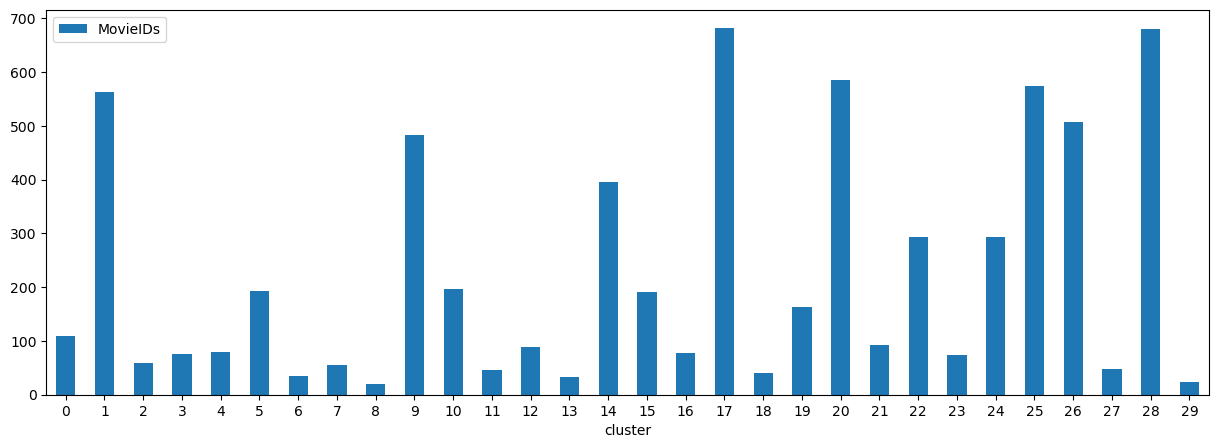

In [48]:
# Count the number of unique movies in each cluster
movie_counts.plot.bar(x='cluster', y='MovieIDs', rot=0,figsize=(15, 5) )
plt.show()